# ML Notebook 2: Unsupervised learning , Dimensionality Reduction

In [2]:
#Import required modules
from sklearn.decomposition import PCA
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pickle
import matplotlib.cm as cm
from sklearn.preprocessing import minmax_scale
from tqdm import tqdm 
import copyreg

In [41]:
plt.style.use('fast')
plt.rcParams['axes.grid'] = False

In [4]:
# explicit function to normalize array
def normalize_2d(matrix):
    norm = np.linalg.norm(matrix)
    matrix = matrix/norm  # normalized matrix
    return matrix

In [7]:
# Read in the pickled df from the previous notebook
# 00_eda+feature_engineering_ML_pipeline.ipynb
df = pd.read_pickle('data/SCUT-FBP5500_v2/df/ml_df_0.pkl')

In [8]:
# show columns in df for reference
df.columns

Index(['Filename', 'Orig_img', 'landmarks', 'orb_kp', 'orb_dec', 'Gabor1',
       'Gabor2', 'Gabor3', 'Gabor4', 'Gabor5', 'Gabor6', 'Gabor7', 'Gabor8',
       'Gabor9', 'Gabor10', 'Gabor11', 'Gabor12', 'Gabor13', 'Gabor14',
       'Gabor15', 'Gabor16', 'Gabor17', 'Gabor18', 'Gabor19', 'Gabor20',
       'Gabor21', 'Gabor22', 'Gabor23', 'Gabor24', 'Gabor25', 'Gabor26',
       'Gabor27', 'Gabor28', 'Gabor29', 'Gabor30', 'Gabor31', 'Gabor32',
       'Canny Edge', 'Roberts', 'Sobel', 'Scharr', 'Prewitt', 'Gaussian s3',
       'Gaussian s7', 'Median s3', 'Variance s3', 'asian', 'male'],
      dtype='object')

In [117]:
# We are going to explore Dimensionality Reduction for these two feature sets
# Columns of Interest (COI) these arrays are 122500 and are the Gabor Filters
coi = ['Gabor1','Gabor2', 'Gabor3', 'Gabor4', 'Gabor5', 'Gabor6', 'Gabor7', 'Gabor8',
       'Gabor9', 'Gabor10', 'Gabor11', 'Gabor12', 'Gabor13', 'Gabor14',
       'Gabor15', 'Gabor16', 'Gabor17', 'Gabor18', 'Gabor19', 'Gabor20',
       'Gabor21', 'Gabor22', 'Gabor23', 'Gabor24', 'Gabor25', 'Gabor26',
       'Gabor27', 'Gabor28', 'Gabor29', 'Gabor30', 'Gabor31', 'Gabor32',]

# Columns of Interest 2 (COI2) these arrays are 350 x350 and are the edge filters
coi2 = ['Canny Edge', 'Roberts', 'Sobel', 'Scharr', 'Prewitt', 'Gaussian s3',
       'Gaussian s7', 'Median s3', 'Variance s3']

In [130]:
# printing out shape to review before reducing
smpl = df[df.Filename =='CM712.jpg']
for v in smpl[coi].iloc[0,:].values:
    print(v.shape)

(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)
(122500, 1)


# PCA #1: First we are going to test reducing our gabor filters
### The concept here is to mimic pooling from our CNNs. So we will flatten/reduce our convolutions (Gabor Filters).

In [131]:
# Create a matrix representation of a single image
# each vector is a Gabor Filter
pca_coi_mat = np.hstack(smpl[coi].iloc[0,:].values)

# explore the effects of minmax scaling prior to PCA
scaled_pca = minmax_scale(pca_coi_mat)

# normalize all values for centering before pca
# Normalization is important in PCA since it is a variance maximizing exercise
norm_pca = normalize_2d(pca_coi_mat)

## First we will calculate all the components to see variance ratios

In [132]:
pca = PCA() # 
converted_data = pca.fit_transform(norm_pca)

In [133]:
# so this makes it apparent we can reduce down to 2 components
np.round(pca.explained_variance_ratio_,3)

array([0.821, 0.126, 0.03 , 0.008, 0.007, 0.002, 0.002, 0.001, 0.001,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   ])

## Now that we know we can reduce to 2 dimensions, let's represent this visually

In [134]:
# We will explore normalized ( best practice) versus unnormalized
# Given that the domain is the same across every feature vector,
# The normalization shouldn't have a profound affect
pca2 = PCA(2)
converted_data2 = pca2.fit_transform(norm_pca)

pca3 = PCA(2) # first let's see how much variance and so keep all of them
converted_data3= pca3.fit_transform(pca_coi_mat)

In [135]:
# not normalized
# re ran the above switching out the variable fitted
pca3.components_

array([[-1.19145868e-23,  3.51722768e-28, -1.44758697e-01,
        -2.99373585e-01, -4.00224860e-01, -3.53364455e-01,
        -2.58726500e-01, -1.43138925e-01, -1.87234010e-36,
         1.58929062e-35, -2.33798348e-01, -2.58598960e-01,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -1.39760548e-03, -8.17190357e-02, -2.24944884e-01,
        -3.20153504e-03, -3.69939482e-01, -1.43249096e-01,
        -0.00000000e+00, -0.00000000e+00, -4.12750521e-02,
        -7.60979780e-02, -1.75051070e-01, -9.24546129e-02,
        -3.14419177e-01, -1.87617014e-01],
       [ 8.32680414e-17, -2.51961000e-21, -3.01542790e-01,
        -3.30532776e-01, -4.81613256e-02,  3.30119664e-01,
         2.44072190e-01,  1.33894341e-01,  4.96992139e-35,
        -5.36587229e-35, -3.47080861e-01, -3.44149474e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -3.89

In [136]:
# normalized
pca2.components_

array([[ 1.05627497e-23, -9.32759369e-29, -1.44758697e-01,
        -2.99373585e-01, -4.00224860e-01, -3.53364455e-01,
        -2.58726500e-01, -1.43138925e-01, -5.17949014e-35,
        -1.21795654e-35, -2.33798348e-01, -2.58598960e-01,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -1.39760548e-03, -8.17190357e-02, -2.24944884e-01,
        -3.20153504e-03, -3.69939482e-01, -1.43249096e-01,
        -0.00000000e+00, -0.00000000e+00, -4.12750521e-02,
        -7.60979780e-02, -1.75051070e-01, -9.24546129e-02,
        -3.14419177e-01, -1.87617014e-01],
       [-5.55104529e-17,  2.32759466e-22, -3.01542790e-01,
        -3.30532776e-01, -4.81613256e-02,  3.30119664e-01,
         2.44072190e-01,  1.33894341e-01, -8.24740260e-35,
        -5.52164845e-35, -3.47080861e-01, -3.44149474e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -3.89

## Reshape the data (350 x 350 ) so we can plot the component in it's image representation

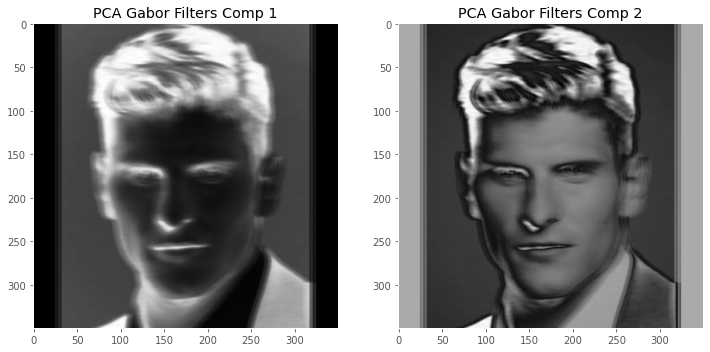

In [137]:
# let's see about reshaping this back into 350 by 350 
c1_orig = converted_data2[:,0].reshape(350,350)
c2_orig = converted_data2[:,1].reshape(350,350)

fig, axes = plt.subplots(1,2,figsize = (12, 12))
axes[0].imshow(c1_orig, cmap = cm.Greys_r, origin='upper')
axes[1].imshow(c2_orig, cmap = cm.Greys_r, origin='upper')
axes[0].set_title('PCA Gabor Filters Comp 1', fontdict={'color':'black'})
axes[1].set_title('PCA Gabor Filters Comp 2', fontdict={'color':'black'})  
plt.show()

# PCA #2: Next we are going to test the edge filters
### The concept here is to mimic pooling from our CNNs. So we will flatten/reduce our 
### convolutions (Edge Filters), blurs (Gaussian), and the median and variance filters.

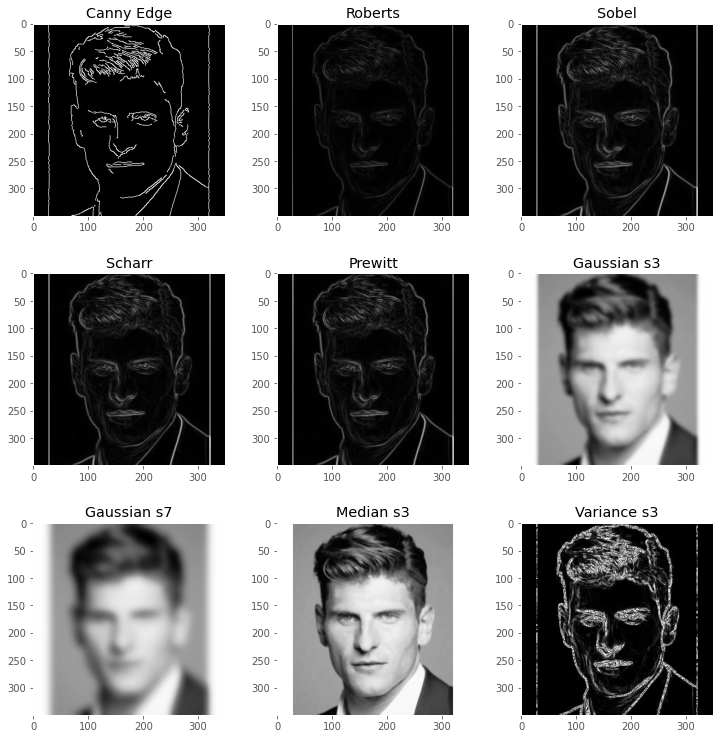

In [138]:
# for reference this is what we are looking at
fig_2, axes_2 = plt.subplots(3,3,figsize = (12, 12),
                             gridspec_kw=dict(left=0.1,right=0.9,bottom=0.1,top=.9,hspace = .3))

axes_2[0,0].imshow(smpl[coi2].iloc[0,0], cmap = cm.Greys_r, origin='upper')
axes_2[0,0].set_title('Canny Edge', fontdict={'color':'black'})
axes_2[0,1].imshow(smpl[coi2].iloc[0,1], cmap = cm.Greys_r, origin='upper')
axes_2[0,1].set_title('Roberts', fontdict={'color':'black'})
axes_2[0,2].imshow(smpl[coi2].iloc[0,2], cmap = cm.Greys_r, origin='upper')
axes_2[0,2].set_title('Sobel', fontdict={'color':'black'})

axes_2[1,0].imshow(smpl[coi2].iloc[0,3], cmap = cm.Greys_r, origin='upper')
axes_2[1,0].set_title('Scharr', fontdict={'color':'black'})
axes_2[1,1].imshow(smpl[coi2].iloc[0,4], cmap = cm.Greys_r, origin='upper')
axes_2[1,1].set_title('Prewitt', fontdict={'color':'black'})
axes_2[1,2].imshow(smpl[coi2].iloc[0,5], cmap = cm.Greys_r, origin='upper')
axes_2[1,2].set_title('Gaussian s3', fontdict={'color':'black'})

axes_2[2,0].imshow(smpl[coi2].iloc[0,6], cmap = cm.Greys_r, origin='upper')
axes_2[2,0].set_title('Gaussian s7', fontdict={'color':'black'})
axes_2[2,1].imshow(smpl[coi2].iloc[0,7], cmap = cm.Greys_r, origin='upper')
axes_2[2,1].set_title('Median s3', fontdict={'color':'black'})
axes_2[2,2].imshow(smpl[coi2].iloc[0,8], cmap = cm.Greys_r, origin='upper')
axes_2[2,2].set_title('Variance s3', fontdict={'color':'black'})

plt.show()

## First we will calculate all the components to see variance ratios

In [139]:
# We need to unravel/ flatten the matrix into an array for computation
# applying and transforming doesn't work for df but does for series
#smpl[coi2].transform(lambda x: x.reshape(-1,1), axis=1)\
    
pca_coi2_mat = np.hstack(smpl[coi2].iloc[0,:].apply(lambda x: x.reshape(-1,1)))

# again normalizing the data
norm_coi2_pca = normalize_2d(pca_coi2_mat)

pca_coi2 = PCA() # first let's see how much variance and so keep all of them
converted_data = pca_coi2.fit_transform(norm_coi2_pca)
np.round(pca_coi2.explained_variance_ratio_,3)

array([0.73 , 0.187, 0.072, 0.01 , 0.001, 0.   , 0.   , 0.   , 0.   ])

## Looks like 2 components is enough

In [140]:
pca_coi2_mat = np.hstack(smpl[coi2].iloc[0,:].apply(lambda x: x.reshape(-1,1)))

# again normalizing the data
norm_coi2_pca = normalize_2d(pca_coi2_mat)

pca_coi2_c2 = PCA(2) # first let's see how much variance and so keep all of them
converted_data_c2 = pca_coi2_c2.fit_transform(norm_coi2_pca)

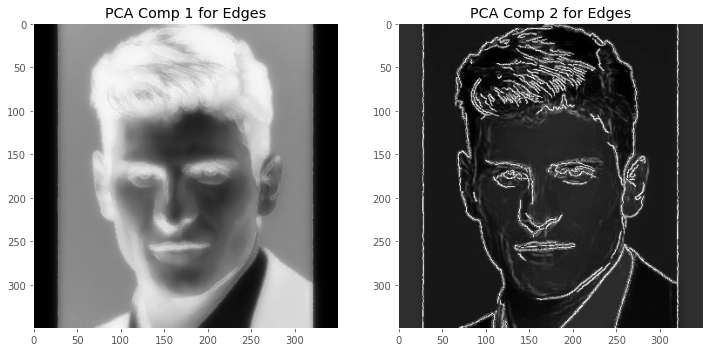

In [141]:
coi2_c1_orig = converted_data_c2[:,0].reshape(350,350)
coi2_c2_orig = converted_data_c2[:,1].reshape(350,350)

fig_3, axes_3 = plt.subplots(1,2,figsize = (12, 12))
axes_3[0].imshow(coi2_c1_orig, cmap = cm.Greys_r, origin='upper')
axes_3[1].imshow(coi2_c2_orig, cmap = cm.Greys_r, origin='upper')
axes_3[0].set_title('PCA Comp 1 for Edges', fontdict={'color':'black'})
axes_3[1].set_title('PCA Comp 2 for Edges', fontdict={'color':'black'}) 
plt.show()

# PCA #3: Next we are going to explore merging all the filters into 2 components
### The concept here is to mimic pooling from our CNNs. So we will flatten/reduce our filters

In [142]:
# do this columnwise transformation on misshaped columns
# smpl.Roberts.apply(lambda x: x.reshape(-1,1))

for col in coi2:
    smpl[col] = smpl[col].apply(lambda x: x.reshape(-1,1))
    
# Let's check to see (last columns were changed -9:-2)
smpl.iloc[0,-9:-2]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Sobel          [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....
Scharr         [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....
Prewitt        [[7.850462293418875e-17], [7.850462293418875e-...
Gaussian s3    [[255], [255], [255], [255], [255], [255], [25...
Gaussian s7    [[254], [253], [253], [253], [253], [253], [25...
Median s3      [[255], [255], [255], [255], [255], [255], [25...
Variance s3    [[0], [0], [0], [0], [0], [0], [0], [0], [0], ...
Name: 0, dtype: object

In [143]:
pca_all = np.hstack(smpl.iloc[0,5:-2])

# again normalizing the data
norm_pca_all = normalize_2d(pca_all)

pca_ = PCA(2) # first let's see how much variance and so keep all of them
converted_all = pca_.fit_transform(norm_pca_all)
pca_.explained_variance_ratio_

array([0.76125722, 0.10842401])

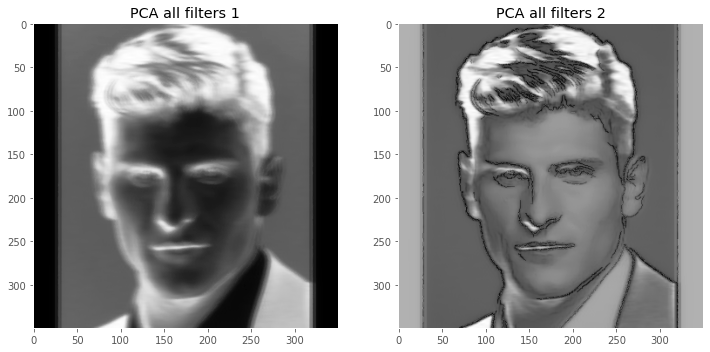

In [144]:
all_c1_orig = converted_all[:,0].reshape(350,350)
all_c2_orig = converted_all[:,1].reshape(350,350)

fig_4, axes_4 = plt.subplots(1,2,figsize = (12, 12))
axes_4[0].imshow(all_c1_orig, cmap = cm.Greys_r, origin='upper')
axes_4[1].imshow(all_c2_orig, cmap = cm.Greys_r, origin='upper')
axes_4[0].set_title('PCA all filters 1', fontdict={'color':'black'})
axes_4[1].set_title('PCA all filters 2', fontdict={'color':'black'}) 
plt.show()

# PCA #4: PCA directly on grayscale image
## This is a necessary comparison to understand the effects of filtering on our representation.

In [145]:
filename = smpl.Filename[0]
img = cv2.cvtColor(cv2.imread('data/SCUT-FBP5500_v2'+ '/Images/'+ filename), cv2.COLOR_BGR2GRAY) 
img.shape

(350, 350)

In [146]:
direct_pca = PCA(20) # first let's see how much variance and so keep all of them
converted_direct = direct_pca.fit_transform(normalize_2d(img))

In [147]:
# dramatic difference in explained variance
np.round(direct_pca.explained_variance_ratio_,3)

array([0.485, 0.209, 0.092, 0.052, 0.037, 0.027, 0.014, 0.012, 0.01 ,
       0.009, 0.007, 0.005, 0.005, 0.004, 0.003, 0.003, 0.002, 0.002,
       0.002, 0.002])

In [148]:
round(sum(direct_pca.explained_variance_ratio_),3)

0.982

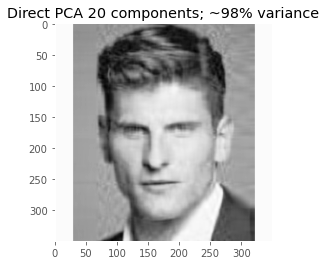

In [149]:
plt.title('Direct PCA 20 components; ~98% variance', fontdict={'color':'black'})
plt.imshow(direct_pca.inverse_transform(converted_direct), cmap = cm.Greys_r, origin='upper')

# Summary
### We have decided that pooling all the filters is a logical feature engineering step as it: 
* greatly reduces the dimensionality while explaining variance; 
* normalizes the data ; 
* "smooths" the image representation. 

# Process, reduce, the data from 00_eda+feature_engineering_ML_pipeline.ipynb
## This step reduces our dataframes from 36 gb with all the filters, 10 gb
## This also reduces the dimensionality of our data 122k dim array * 41 (filters) -> 122K * 2 PCA comps

In [17]:
# this is our helper function
def dim_reduce(path):
    """
    Take in pickled data frame path and reduce the dimensions
    
    Returns reduced df for exporting
    """
    df_reduced = pd.DataFrame()
    
    pca_columns = ['Gabor1', 'Gabor2', 'Gabor3', 'Gabor4', 'Gabor5', 'Gabor6', 'Gabor7',
       'Gabor8', 'Gabor9', 'Gabor10', 'Gabor11', 'Gabor12', 'Gabor13',
       'Gabor14', 'Gabor15', 'Gabor16', 'Gabor17', 'Gabor18', 'Gabor19',
       'Gabor20', 'Gabor21', 'Gabor22', 'Gabor23', 'Gabor24', 'Gabor25',
       'Gabor26', 'Gabor27', 'Gabor28', 'Gabor29', 'Gabor30', 'Gabor31',
       'Gabor32', 'Canny Edge', 'Roberts', 'Sobel', 'Scharr', 'Prewitt',
       'Gaussian s3', 'Gaussian s7', 'Median s3', 'Variance s3']
    
    # read in pickled data
    df = pd.read_pickle(path)
    # first column-wise reshaping of edge filters
    for col in ['Canny Edge', 'Roberts', 'Sobel', 'Scharr', 'Prewitt',
    'Gaussian s3', 'Gaussian s7', 'Median s3', 'Variance s3']:
        df[col] = df[col].apply(lambda x: x.reshape(-1,1))
    
    # next row-wise operation for PCA
    for ix, row in df.iterrows():
        
        # we have to create a tmp df to assign arrays
        # pandas will try to assign the array columnwise otherwise
        tmp = pd.DataFrame()
        tmp['Filename'] = [row['Filename']]
        tmp['orb_kp'] = [row['orb_kp']]
        tmp['orb_dec'] = [row['orb_dec']]
        
        # Gender & Race encoding - since it didn't work the first time
        if row[0][1] == 'M' :
            #df.at[ix,'male'] = 1
            tmp['male'] = 1
        if row[0][0] == 'A':
            #df.at[ix,'asian'] = 1
            tmp['asian'] = 1
        
        pca_all = np.hstack(row[pca_columns])

        # again normalizing the data
        norm_pca_all = normalize_2d(pca_all)

        pca_ = PCA(2) 
        converted_all = pca_.fit_transform(norm_pca_all)
        tmp['PCA_1'] = [converted_all[:,0]]
        tmp['PCA_2'] = [converted_all[:,1]]
        
        #df.at[ix, 'PCA_1'] = converted_all[:,0]
        #df.at[ix, 'PCA_2'] = converted_all[:,1]
            
        df_reduced = pd.concat([df_reduced, tmp])
        
    return df_reduced
    

## Due to hardware constraints we need to process this in batches

In [18]:
# How many elements each list should have 
n = 3
p = 'data/SCUT-FBP5500_v2/df/'
fl = os.listdir(p)
fl.remove('.DS_Store')   

# using list comprehension to generate batches
batches = [fl[i:i + n] for i in range(0, len(fl), n)] 

# this solves the pickling kaypoints issue
def _pickle_keypoints(point):
    return cv2.KeyPoint, (*point.pt, point.size, point.angle,
                          point.response, point.octave, point.class_id)
 
# fix it once    
copyreg.pickle(cv2.KeyPoint().__class__, _pickle_keypoints) 

In [19]:
# loop through the batches with progress reports
for i, batch in enumerate(batches):
    
    print(f'working on batch {i} of {len(batches)}')
    tmp = pd.DataFrame()
    
    for ix,f in tqdm(enumerate(batch)):
            print(f'Trying {f}')
            tr = dim_reduce(p + f)
            tmp = pd.concat([tmp, tr])  
            
    with open(f"data/SCUT-FBP5500_v2/reduced/ml_df_reduced{i}.pkl","wb") as p_dump:
            pickle.dump(tmp, p_dump)        
                  
    print(f'done with batch {i}')

working on batch 0 of 19


0it [00:00, ?it/s]

Trying ml_df_49.pkl


1it [01:02, 62.08s/it]

Trying ml_df_48.pkl


2it [02:19, 70.87s/it]

Trying ml_df_15.pkl


3it [03:21, 67.09s/it]


done with batch 0
working on batch 1 of 19


0it [00:00, ?it/s]

Trying ml_df_29.pkl


1it [00:54, 54.91s/it]

Trying ml_df_1.pkl


2it [01:47, 53.72s/it]

Trying ml_df_0.pkl


3it [02:40, 53.52s/it]


done with batch 1
working on batch 2 of 19


0it [00:00, ?it/s]

Trying ml_df_28.pkl


1it [00:53, 53.03s/it]

Trying ml_df_14.pkl


2it [01:45, 52.71s/it]

Trying ml_df_16.pkl


3it [02:38, 52.98s/it]


done with batch 2
working on batch 3 of 19


0it [00:00, ?it/s]

Trying ml_df_2.pkl


1it [00:53, 53.53s/it]

Trying ml_df_3.pkl


2it [01:45, 52.56s/it]

Trying ml_df_17.pkl


3it [02:37, 52.55s/it]


done with batch 3
working on batch 4 of 19


0it [00:00, ?it/s]

Trying ml_df_13.pkl


1it [00:52, 52.81s/it]

Trying ml_df_7.pkl


2it [01:45, 52.58s/it]

Trying ml_df_6.pkl


3it [02:37, 52.46s/it]


done with batch 4
working on batch 5 of 19


0it [00:00, ?it/s]

Trying ml_df_12.pkl


1it [00:53, 53.02s/it]

Trying ml_df_38.pkl


2it [01:45, 52.74s/it]

Trying ml_df_10.pkl


3it [02:38, 52.71s/it]


done with batch 5
working on batch 6 of 19


0it [00:00, ?it/s]

Trying ml_df_4.pkl


1it [00:53, 53.28s/it]

Trying ml_df_5.pkl


2it [01:45, 52.76s/it]

Trying ml_df_11.pkl


3it [02:38, 52.94s/it]


done with batch 6
working on batch 7 of 19


0it [00:00, ?it/s]

Trying ml_df_39.pkl


1it [00:52, 52.85s/it]

Trying ml_df_34.pkl


2it [01:45, 52.62s/it]

Trying ml_df_20.pkl


3it [02:37, 52.53s/it]


done with batch 7
working on batch 8 of 19


0it [00:00, ?it/s]

Trying ml_df_8.pkl


1it [00:52, 52.88s/it]

Trying ml_df_9.pkl


2it [01:45, 52.53s/it]

Trying ml_df_21.pkl


3it [02:37, 52.65s/it]


done with batch 8
working on batch 9 of 19


0it [00:00, ?it/s]

Trying ml_df_35.pkl


1it [00:52, 52.67s/it]

Trying ml_df_23.pkl


2it [01:45, 52.83s/it]

Trying ml_df_37.pkl


3it [02:37, 52.54s/it]


done with batch 9
working on batch 10 of 19


0it [00:00, ?it/s]

Trying ml_df_36.pkl


1it [00:52, 52.69s/it]

Trying ml_df_22.pkl


2it [01:46, 53.41s/it]

Trying ml_df_26.pkl


3it [02:39, 53.26s/it]


done with batch 10
working on batch 11 of 19


0it [00:00, ?it/s]

Trying ml_df_32.pkl


1it [01:02, 62.95s/it]

Trying ml_df_33.pkl


2it [01:58, 58.64s/it]

Trying ml_df_27.pkl


3it [02:53, 57.82s/it]


done with batch 11
working on batch 12 of 19


0it [00:00, ?it/s]

Trying ml_df_19.pkl


1it [00:55, 55.01s/it]

Trying ml_df_31.pkl


2it [01:49, 54.98s/it]

Trying ml_df_25.pkl


3it [02:45, 55.14s/it]


done with batch 12
working on batch 13 of 19


0it [00:00, ?it/s]

Trying ml_df_24.pkl


1it [00:57, 57.05s/it]

Trying ml_df_30.pkl


2it [01:51, 55.61s/it]

Trying ml_df_18.pkl


3it [02:46, 55.43s/it]


done with batch 13
working on batch 14 of 19


0it [00:00, ?it/s]

Trying ml_df_43.pkl


1it [00:55, 55.92s/it]

Trying ml_df_42.pkl


2it [01:49, 54.73s/it]

Trying ml_df_40.pkl


3it [02:43, 54.53s/it]


done with batch 14
working on batch 15 of 19


0it [00:00, ?it/s]

Trying ml_df_54.pkl


1it [00:54, 54.94s/it]

Trying ml_df_55.pkl


2it [00:55, 23.00s/it]

Trying ml_df_41.pkl


3it [01:50, 36.73s/it]


done with batch 15
working on batch 16 of 19


0it [00:00, ?it/s]

Trying ml_df_45.pkl


1it [00:54, 54.98s/it]

Trying ml_df_51.pkl


2it [01:49, 54.42s/it]

Trying ml_df_50.pkl


3it [02:43, 54.35s/it]


done with batch 16
working on batch 17 of 19


0it [00:00, ?it/s]

Trying ml_df_44.pkl


1it [00:54, 54.86s/it]

Trying ml_df_52.pkl


2it [01:48, 54.26s/it]

Trying ml_df_46.pkl


3it [02:47, 55.99s/it]


done with batch 17
working on batch 18 of 19


0it [00:00, ?it/s]

Trying ml_df_47.pkl


1it [00:58, 58.43s/it]

Trying ml_df_53.pkl


2it [01:56, 58.21s/it]


done with batch 18


# Job Done
